# Traitement des données G353 TP+7m+12m N2H+

In [2]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


***
# Verification des données enregistré

In [2]:
im_g = np.load("/user/workdir/soldanof/data/G353f/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f/coh.npy")

Text(0.5, 1.0, 'Coherent')

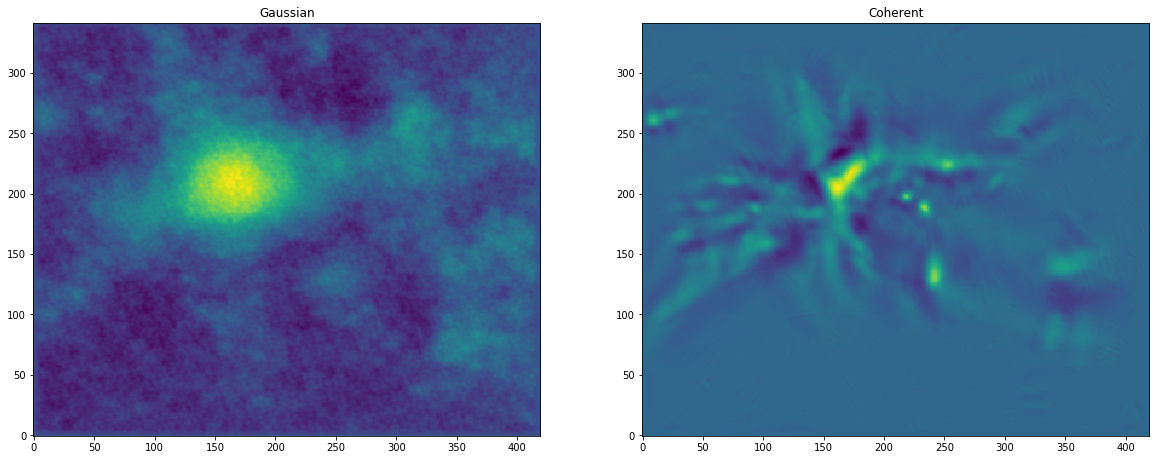

In [3]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[50].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[50].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

Text(0.5, 1.0, 'canal 100')

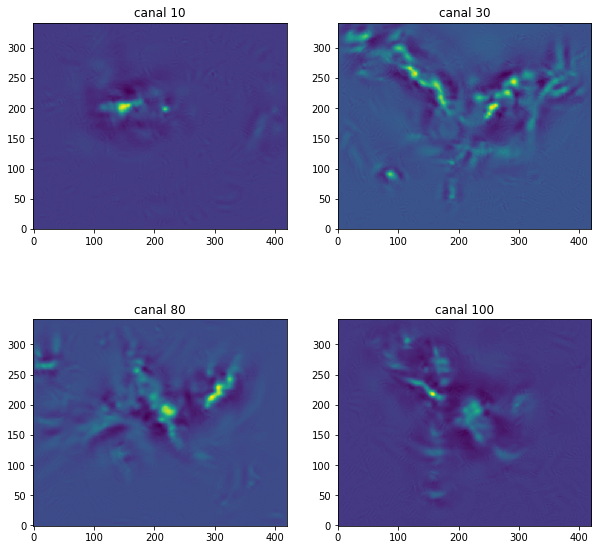

In [469]:
figure(figsize=(10,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

subplot(2,2,3)
imshow(im_ng[80].real,origin="lower")
title('canal 80')

subplot(2,2,4)
imshow(im_ng[100].real,origin="lower")
title('canal 100')

***
# Transformation des données en fichier fits

In [600]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_feathered_n2hp_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [6]:
fits.writeto("/user/workdir/soldanof/data/G353f/ng.fits",im_ng.real, header) 

In [7]:
fits.writeto("/user/workdir/soldanof/data/G353f/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -1.283e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.286e-01 [aplpy.core]


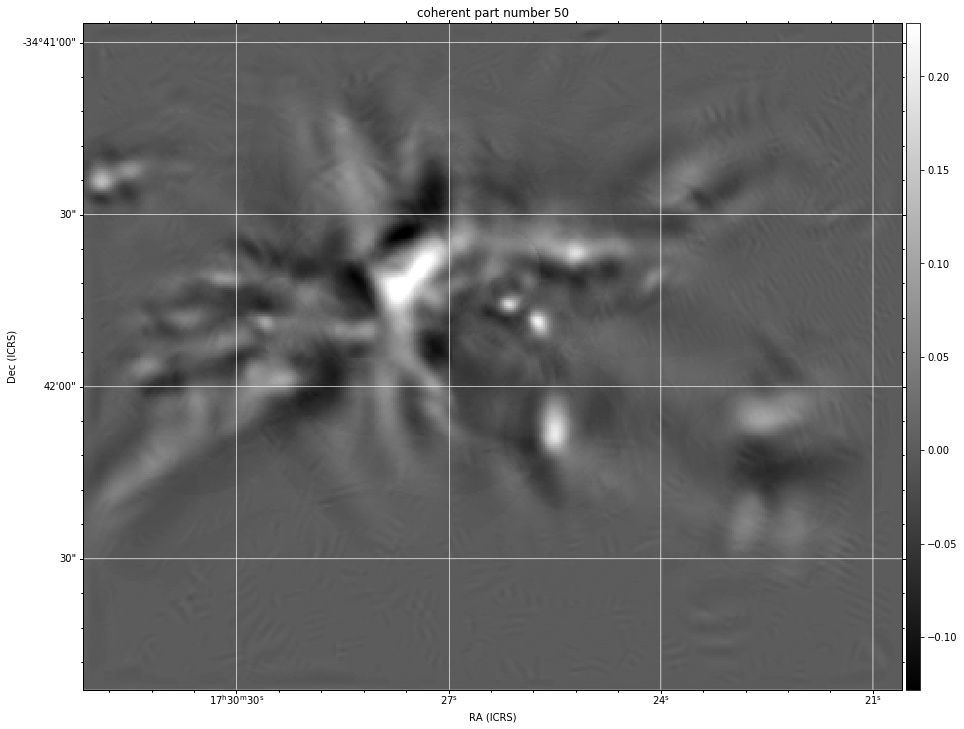

In [8]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 50
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -1.170e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.126e-01 [aplpy.core]


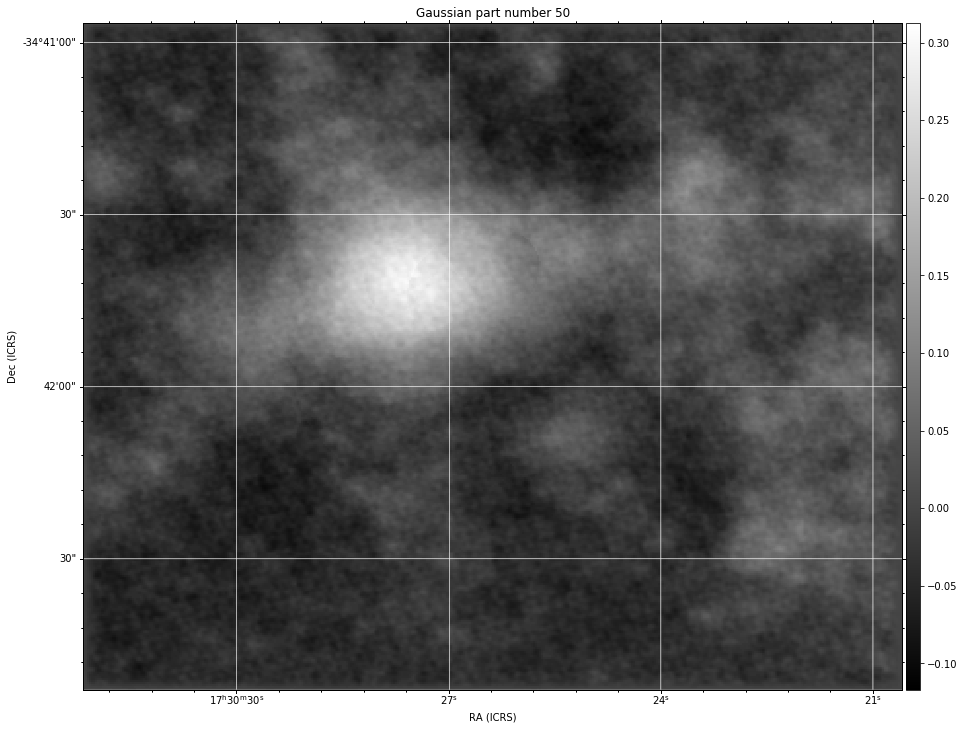

In [9]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
Trace Freq en fonction de Ra pour la partie gaussienne et la partie cohérente

INFO: Auto-setting vmin to -9.049e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.969e-02 [aplpy.core]


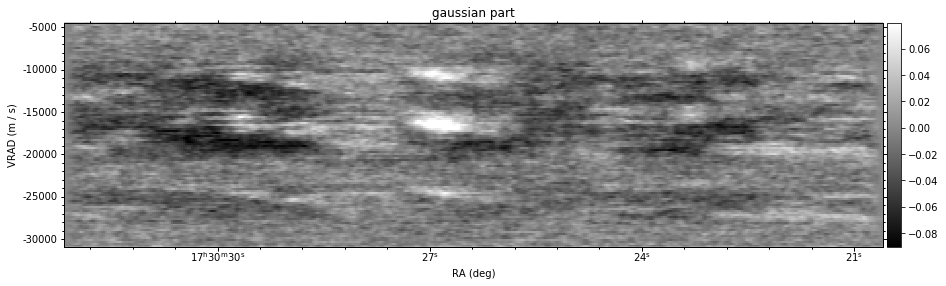

In [4]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/gau.fits",figure=fig_all,dimensions=[0,2],slices=[100])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("gaussian part")

INFO: Auto-setting vmin to -1.595e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.124e-01 [aplpy.core]


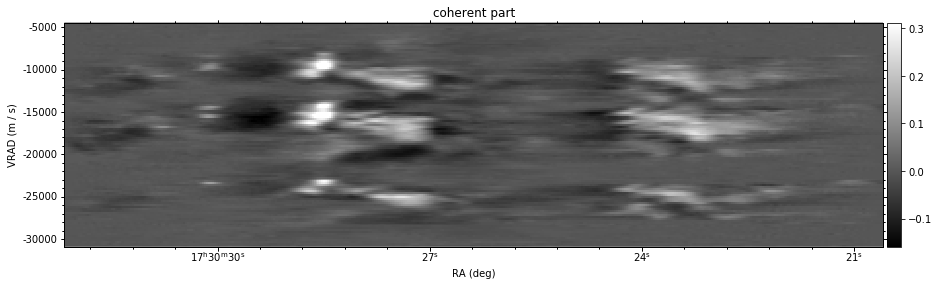

In [3]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/ng.fits",figure=fig_all,dimensions=[0,2],slices=[250])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("coherent part")

***

INFO: Auto-setting vmin to -1.532e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.368e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.549e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.810e-01 [aplpy.core]


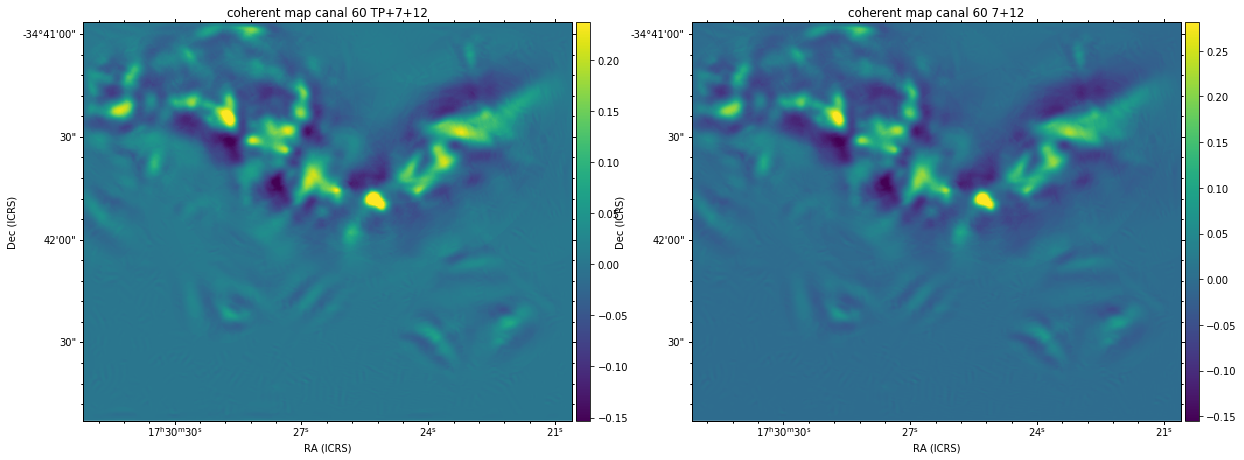

In [499]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/ng.fits",figure=fig_vel,subplot=(1,2,1),slices=[60])  
f.show_colorscale()
f.add_colorbar()
f.set_title("coherent map canal 60 TP+7+12")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353/ng.fits",figure=fig_vel,subplot=(1,2,2),slices=[60])  
f.show_colorscale()
f.add_colorbar()
f.set_title("coherent map canal 60 7+12")

***
# creation carte intégré (moment 0)

In [390]:
im_ng.shape

(115, 342, 420)

In [649]:
im_ng_int = np.sum(im_ng,axis=0)

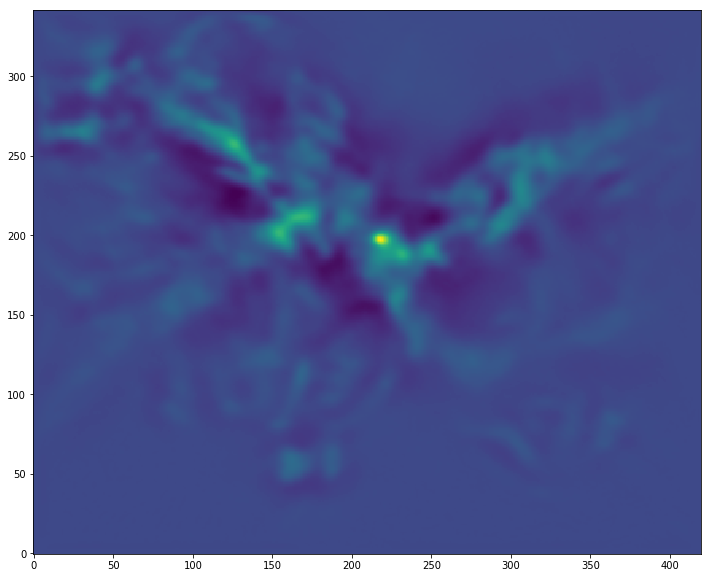

In [650]:
figure(figsize=(20,10))
imshow(im_ng_int.real,origin="lower")

In [15]:
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 original cube')

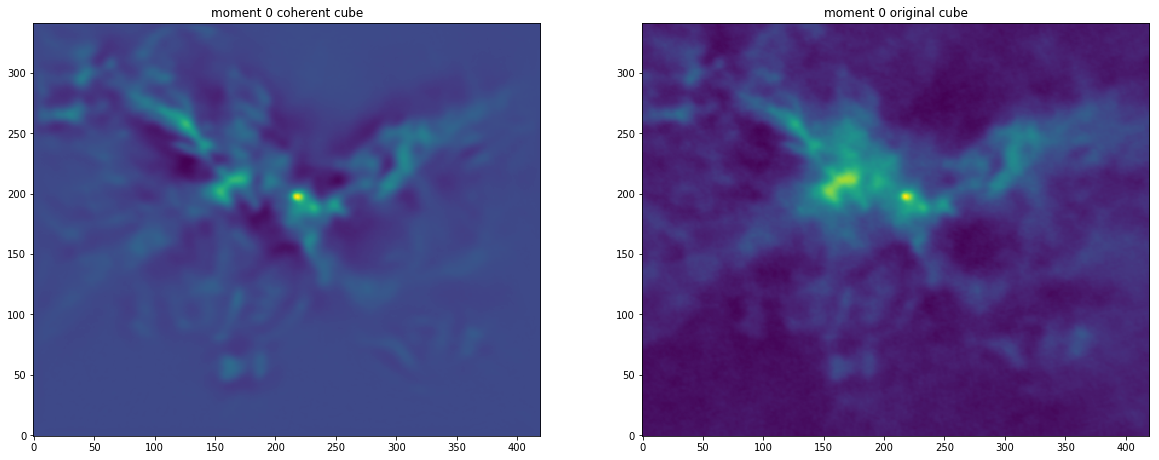

In [396]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent cube')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 original cube') 

In [393]:
del header['NAXIS3']
del header['PC3_1']
del header['PC3_2']
del header['PC1_3']
del header['PC2_3']
del header['PC3_3']
del header['CTYPE3']
del header['CRVAL3']
del header['CDELT3']
del header['CRPIX3']
del header['CUNIT3']

In [394]:
header['NAXIS']=2
fits.writeto("/user/workdir/soldanof/data/G353f/ng_t.fits",im_ng_int.real, header,overwrite= True) 

***
# Moment 1

In [617]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_feathered_n2hp_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [648]:
im_g = np.load("/user/workdir/soldanof/data/G353f/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f/coh.npy")

In [654]:
N = header['NAXIS3']
im_ng = np.load("/user/workdir/soldanof/data/G353f/coh.npy")

for i in range(50,51):
    moy = np.abs(cube[i,:,:]).mean()
    im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    
    im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:50,5:50]).mean()] = moy
    im_rmv[(im_ng_2d)<np.abs(cube[i,5:50,5:50]).mean()] = np.nan
    
    im_ng[i,:,:] = im_ng[i,:,:] + im_ad + im_rmv
    #im_g[i,:,:] = im_g[i,:,:]+moy

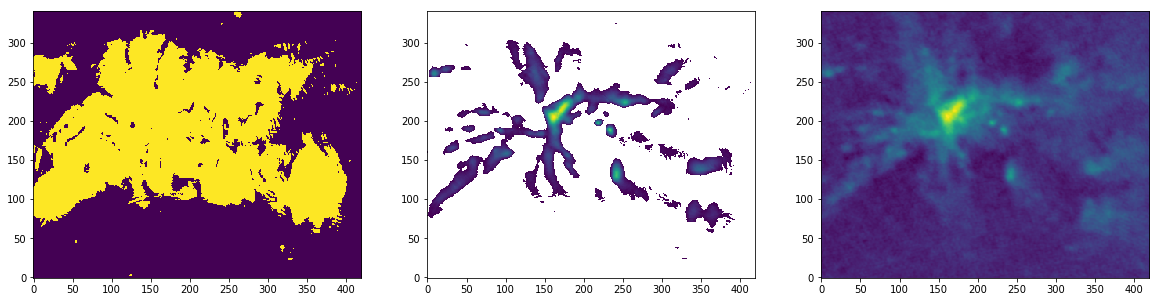

In [655]:
figure(figsize=(20,20))
subplot(131)
imshow(im_ad.real,origin="lower")

subplot(132)
imshow(im_ng[50].real,origin="lower")

subplot(133)
imshow(cube[50].real,origin="lower")

In [652]:
fits.writeto("/user/homedir/soldanof/ng_g353_tp_7_12_mean_.fits",im_ng.real, header, overwrite = True) 

In [607]:
im_g[im_g<0]=0

In [608]:
fits.writeto("/user/homedir/soldanof/g_mean_g353f.fits",im_g.real, header) 

INFO: Auto-setting vmin to -1.607e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.245e+01 [aplpy.core]
INFO: Auto-setting vmin to -2.065e+04 [aplpy.core]
INFO: Auto-setting vmax to -1.351e+04 [aplpy.core]


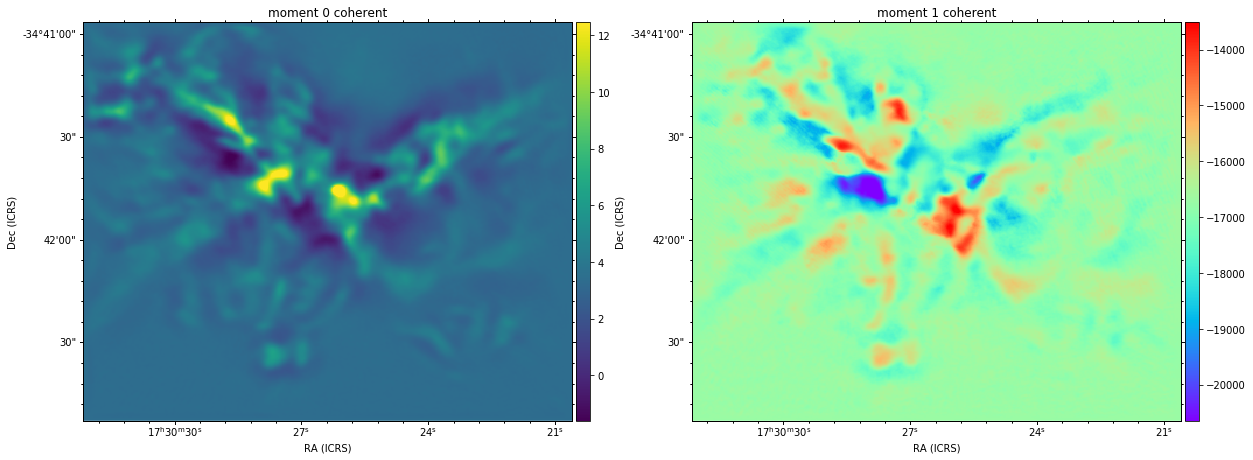

In [467]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/ng_t.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/moment1.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'rainbow')
f.add_colorbar()
f.set_title("moment 1 coherent")

Calcul des carte moment 0 et 1 sur tout le cube mais python choisi quel partie représenter. Ici il centre donc les couleurs sur la partie la plus intense des vitesse, cad lapartie où les fingers se recouvrent 

INFO: Auto-setting vmin to -1.939e+04 [aplpy.core]
INFO: Auto-setting vmax to -1.462e+04 [aplpy.core]
INFO: Auto-setting vmin to -2.051e+04 [aplpy.core]
INFO: Auto-setting vmax to -1.349e+04 [aplpy.core]


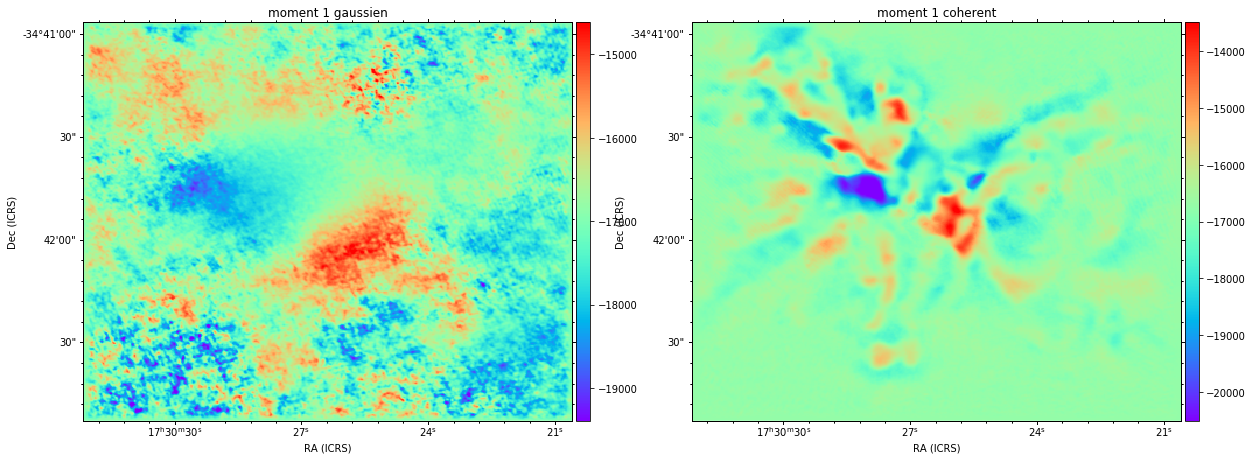

In [609]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/moment1_g_g353_tp.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'rainbow')
f.add_colorbar()
f.set_title("moment 1 gaussien")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/moment1.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'rainbow')
f.add_colorbar()
f.set_title("moment 1 coherent")

INFO: Auto-setting vmin to -2.105e+04 [aplpy.core]
INFO: Auto-setting vmax to -1.338e+04 [aplpy.core]
INFO: Auto-setting vmin to -2.778e+04 [aplpy.core]
INFO: Auto-setting vmax to -2.329e+04 [aplpy.core]


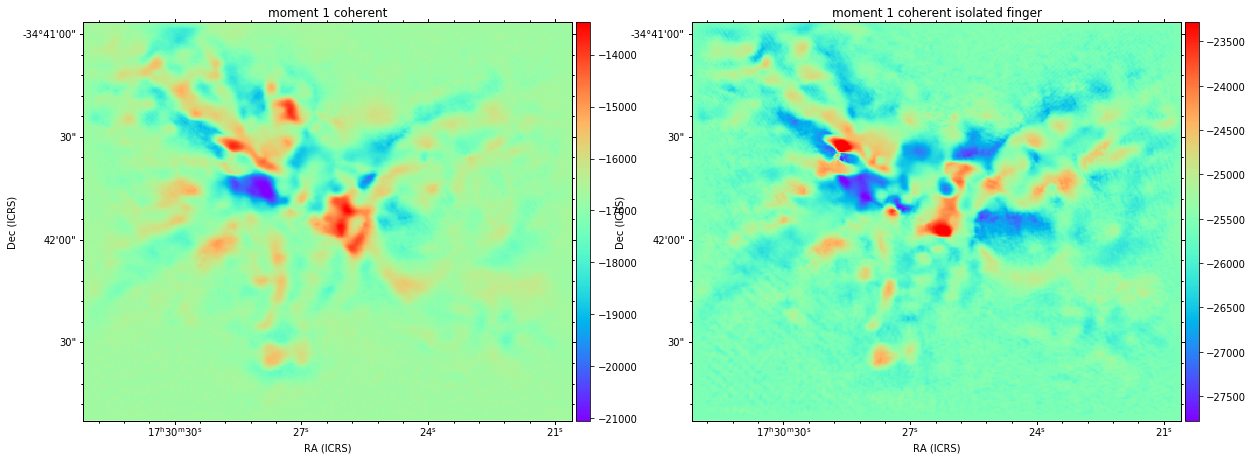

In [616]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/moment1.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'rainbow')
f.add_colorbar()
f.set_title("moment 1 coherent")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f/moment1_ng_g353_tp_isolated.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'rainbow')
f.add_colorbar()
f.set_title("moment 1 coherent isolated finger")

***
# Traitement des donnée du spectre de puissance

In [19]:
t = np.load("/user/workdir/soldanof/data/G353f/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353f/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353f/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/G353f/wave_k.npy")

Fonction de trace du spectre de puissance

In [480]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('P(k)')
    plt.xlabel('k (arcmin$^{-1}$)')
    plt.title('canal number {}'.format(n))
    plt.legend()

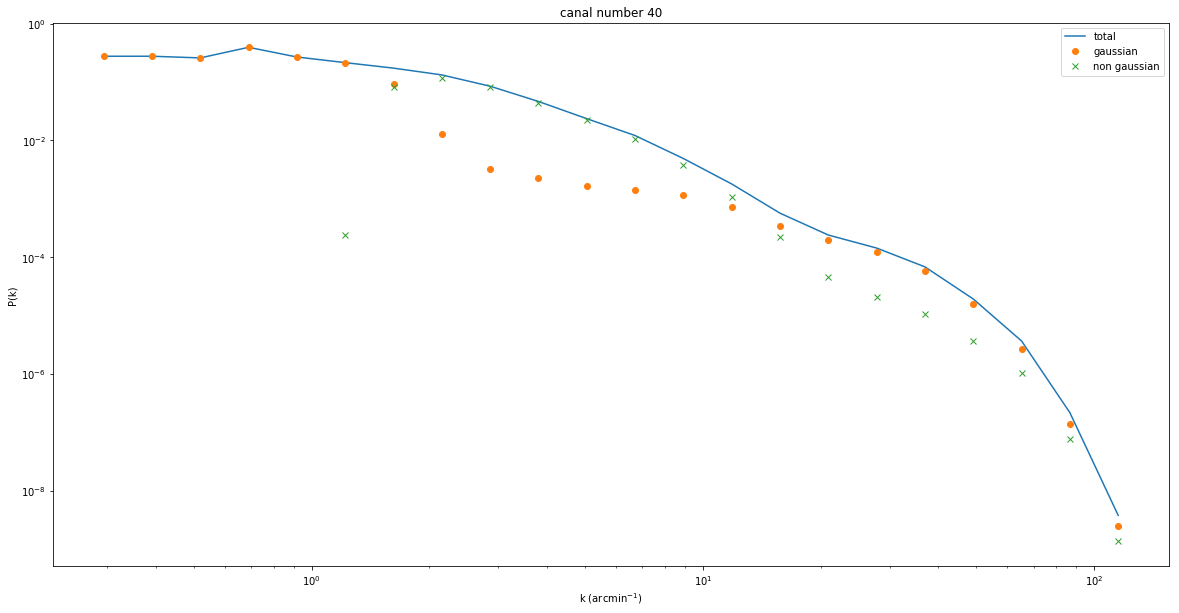

In [481]:
figure(figsize=(20,10))
affiche(40)

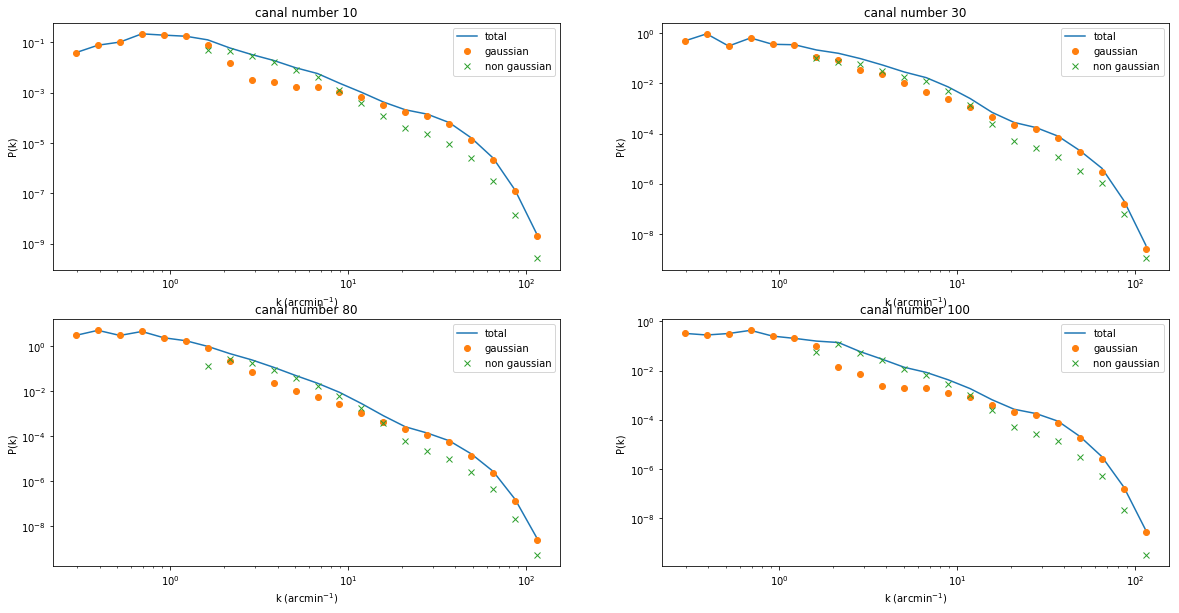

In [492]:
figure(figsize=(20,10))

subplot(2,2,1)
affiche(10)

subplot(2,2,2)
affiche(30)

subplot(2,2,3)
affiche(80)

subplot(2,2,4)
affiche(100)

***
# Corection du beam du télescope

In [54]:
from radio_beam import Beam  
Beam.from_fits_header(header)  

Beam: BMAJ=2.2017731652 arcsec BMIN=1.8260785331999998 arcsec BPA=81.0 deg

In [133]:
header['BMAJ']*60/reso

6.4758034270591285

In [93]:
2.2 / (60*reso)

6.470588235294423

In [132]:
reso

0.0056666666666664

In [28]:
from pywavan import apodize, padding, gauss_beam

In [461]:
#Resolution in arcmin
reso = header['CDELT2'] * 60.

im = cube[50]
#im = im_g[50]

#Apodization
imzm = im - np.mean(im)
tapper = apodize(im.shape[0],im.shape[1],0.98)
imt = imzm *tapper
nsize = 1024
imr = padding(imt, 500,600)


#Fourier Powre Spectrum
tab_k_im, spec_k_im = powspec(im, reso = reso)

In [ ]:
reso = header['CDELT2'] * 60.

In [419]:
#Noise evaluation
noise = np.mean(spec_k_im[(tab_k_im > 80.) & (tab_k_im < 87.)])

In [420]:
noise

2.0202918124320438e-08

In [532]:
#Beam Power spectrum
reso = header['CDELT2'] * 60.
FWHM = 1.2 /(60*reso)  #Beam size + valeur efficiace

beam = gauss_beam(FWHM,342, 420,FWHM=True)
tab_k_im, spec_beam = powspec(beam, reso=reso)
spec_beamn = spec_beam/spec_beam[0]  #Spectrum normalisation

In [533]:
#Power spectrum fit
limites = np.where((tab_k_im >= tab_k_im[2]) & (tab_k_im < tab_k_im[40]))

A = np.polyfit(np.log(tab_k_im[limites]), np.log((spec_k_im[limites]-noise)/spec_beamn[limites]),deg=1)
fit_im = np.exp(A[1])*tab_k_im**A[0]
print('Pywavan fBm Power fit')
print('A, Gamma = ', np.exp(A[1]), A[0])

Pywavan fBm Power fit
A, Gamma =  14.283125830000074 -3.006444096114095


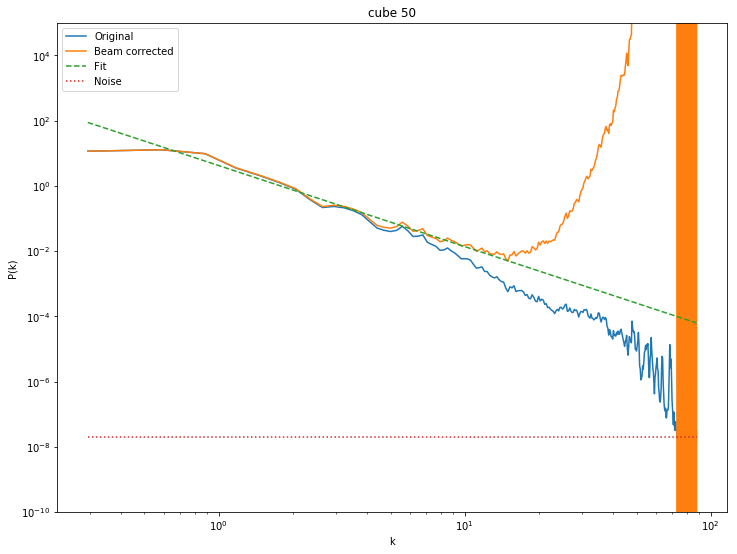

In [289]:
figure(figsize=(12,9))
plot(tab_k_im, spec_k_im, label='Original')
plot(tab_k_im, (spec_k_im-noise)/spec_beamn, label='Beam corrected')
plot(tab_k_im, fit_im, linestyle='--', label='Fit')
plot([tab_k_im[0],tab_k_im[-1]], [noise,noise], linestyle=':', label='Noise')
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
ylim(10**-10,10**5)
title('cube 50')
legend()

In [543]:
reso = header['CDELT2'] * 60.
FWHM = 1.2/(60*reso) #Beam size

beam = gauss_beam(FWHM,500,600,FWHM=True)
wtB, S11aB, wav_k, S1aB, qB = fan_trans(beam, reso=reso, q=0, angular=False)
del  wtB, S11aB, qB

100%|██████████| 22/22 [00:08<00:00,  2.47it/s]


In [544]:
#Normalisation
S1aBn = S1aB/S1aB[4]
S1aBn[:3] = 1.

In [545]:
reso = header['CDELT2'] * 60.
FWHM = header['BMAJ'] * 60 /(reso*np.sqrt(2))#Beam size

beam = gauss_beam(FWHM,500,600,FWHM=True)
wtB, S11aB, wav_k2, S1aB2, qB = fan_trans(beam, reso=1, q=0, angular=False)
del  wtB, S11aB, qB

100%|██████████| 22/22 [00:08<00:00,  2.56it/s]


In [404]:
#Normalisation
S1aBn2 = S1aB2/S1aB2[4]
S1aBn2[:3] = 1.

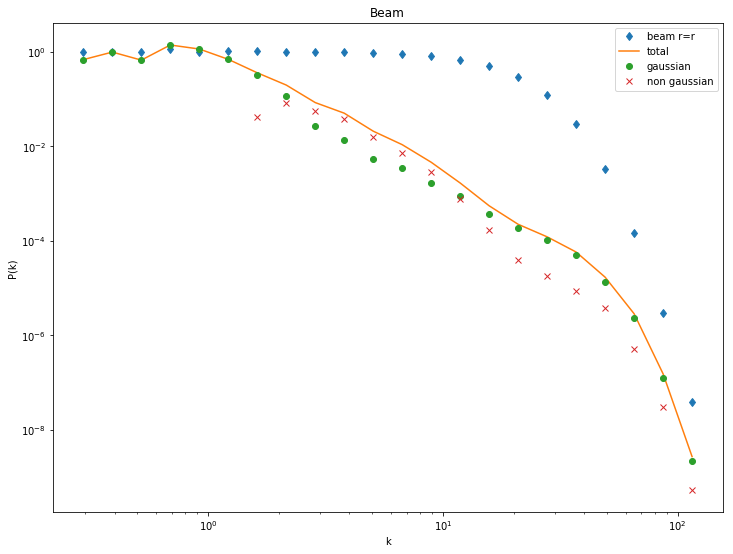

In [546]:
figure(figsize=(12,9))
n=15
plot(wav_k,  S1aBn,'d', label='beam r=r')
#plot(wav_k2,  S1aBn2,'v', label='beam r=1')
plt.plot(w_k, t[n],label="total")
plt.plot(w_k, g[n],"o",label="gaussian")
plt.plot(w_k, ng[n],"x",label="non gaussian")
plt.xscale("log")
plt.yscale("log")
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
title('Beam')
legend()

In [541]:
#Power spectrum fit
num=50
Ag = np.polyfit(np.log(w_k[5:-5]), np.log((t[num][5:-5]-noise)/S1aBn[5:-5]),deg=1)
fitG = np.exp(Ag[1])*wav_k**Ag[0]
print('Gaussian Power fit')
print('A, Gamma = ', np.exp(Ag[1]), Ag[0])

Gaussian Power fit
A, Gamma =  4.650358621055665 -2.83598962880489


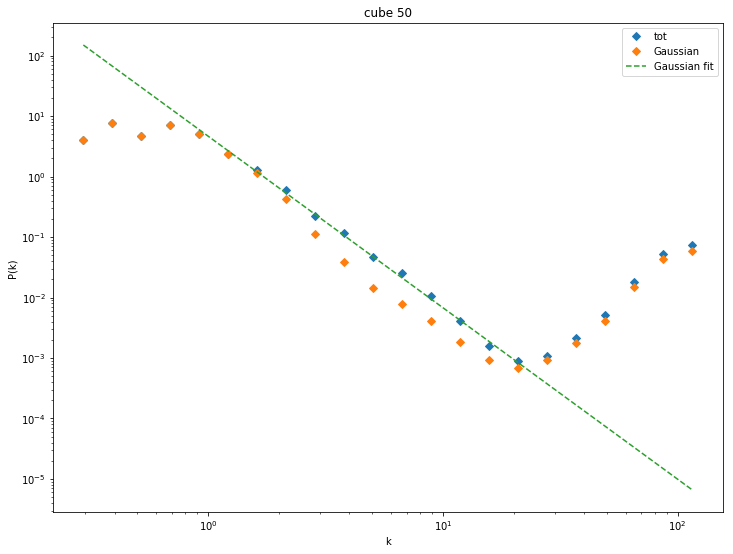

In [572]:
figure(figsize=(12,9))
num=50
#plot(tab_k_im, spec_k_im, label='Fourier')
#plot(wav_k, S1a[1,:], 'D', label='Coherent')
#plot(wav_k, S1a[2,:], 'D', label='Gaussian')
#plot(tab_k_im, (spec_k_im-noise)/spec_beamn, label='Fourier')
plot(wav_k, (t[num])/S1aBn, 'D', label='tot')
plot(wav_k, (g[num])/S1aBn, 'D', label='Gaussian')
plot(wav_k, fitG, '--', label='Gaussian fit')
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
title('cube 50')
legend()
#ylim(10**-10,1)

***
## comparaison corection beam avec Turbustat

In [208]:
from turbustat.statistics import PowerSpectrum
from astropy import units as u

In [459]:
im.shape

(115, 342, 420)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1206.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.14e-35
Time:                        10:57:18   Log-Likelihood:                 40.532
No. Observations:                  50   AIC:                            -77.06
Df Residuals:                      48   BIC:                            -73.24
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3745      0.110     -3.414      0.0

/user/homedir/soldanof/.local/lib/python3.7/site-packages/turbustat-1.2.2.dev4+g354d02e-py3.7-linux-x86_64.egg/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


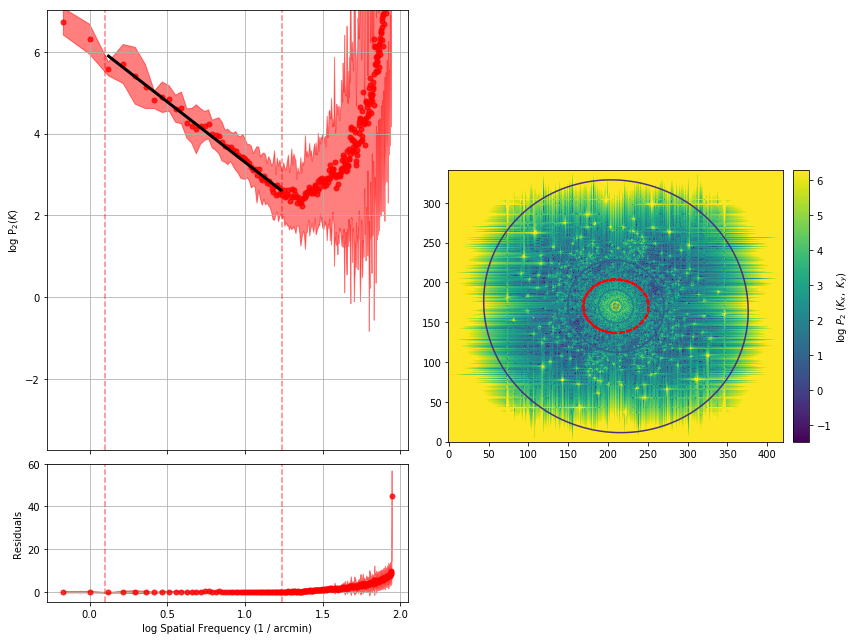

In [591]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353.41_feathered_n2hp_cut.fits")
im = HDU[0].data
header = HDU[0].header
figure(figsize=(12,9))
pspec = PowerSpectrum(im[50],header, beam=Beam(1.2*u.arcsec))
#pspec.run(verbose=True, use_wavenumber=False, fit_2D_kwargs={'fix_ellip_params':True})
pspec.run(verbose=True, beam_correct=True, use_wavenumber=False, xunit=u.arcmin**-1, low_cut=tab_k_im[2] / u.arcmin, high_cut=tab_k_im[40] / u.arcmin)

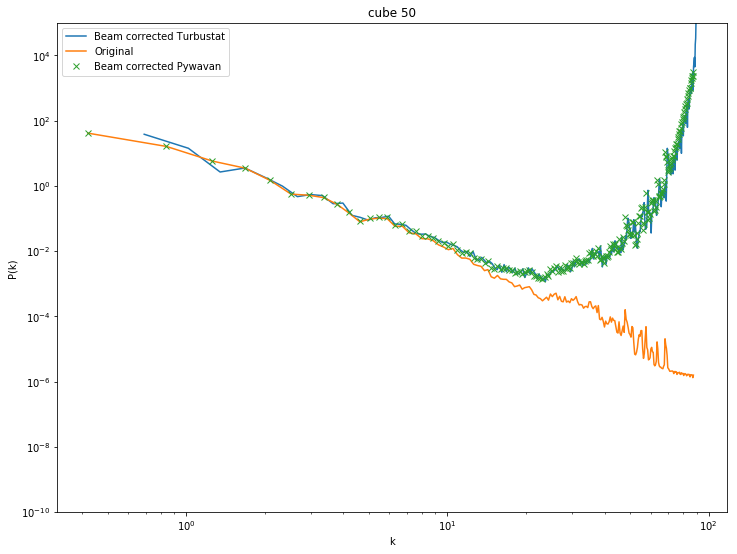

In [592]:
figure(figsize=(12,9))
plot(pspec.wavenumbers/1.9,(pspec.ps1D)/(342*420), label = "Beam corrected Turbustat")
plot(tab_k_im, spec_k_im, label='Original')
plot(tab_k_im, (spec_k_im)/spec_beamn,'x' ,label='Beam corrected Pywavan')
#plot(tab_k_im, fit_im, linestyle='--', label='Fit')
#plot([tab_k_im[0],tab_k_im[-1]], [noise,noise], linestyle=':', label='Noise')
#fit_turb = np.exp(2)*tab_k_im**pspec.slope
#plot(tab_k_im, fit_turb, linestyle='--', label='Fit turbu')
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
ylim(10**-10,10**5)
title('cube 50')
legend()

In [548]:
pspec.slope-A[0]

0.05616508956172739

In [587]:
pspec.wavenumbers

<Quantity [  1.3125,   1.9375,   2.5625,   3.1875,   3.8125,   4.4375,
             5.0625,   5.6875,   6.3125,   6.9375,   7.5625,   8.1875,
             8.8125,   9.4375,  10.0625,  10.6875,  11.3125,  11.9375,
            12.5625,  13.1875,  13.8125,  14.4375,  15.0625,  15.6875,
            16.3125,  16.9375,  17.5625,  18.1875,  18.8125,  19.4375,
            20.0625,  20.6875,  21.3125,  21.9375,  22.5625,  23.1875,
            23.8125,  24.4375,  25.0625,  25.6875,  26.3125,  26.9375,
            27.5625,  28.1875,  28.8125,  29.4375,  30.0625,  30.6875,
            31.3125,  31.9375,  32.5625,  33.1875,  33.8125,  34.4375,
            35.0625,  35.6875,  36.3125,  36.9375,  37.5625,  38.1875,
            38.8125,  39.4375,  40.0625,  40.6875,  41.3125,  41.9375,
            42.5625,  43.1875,  43.8125,  44.4375,  45.0625,  45.6875,
            46.3125,  46.9375,  47.5625,  48.1875,  48.8125,  49.4375,
            50.0625,  50.6875,  51.3125,  51.9375,  52.5625,  53.1875,
      